In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from scipy import stats, integrate
%matplotlib inline

In [4]:
wages = pd.read_csv('Wages.zip')
nurse_wages = pd.read_csv('Nurses-Wages.csv')
population_wages = pd.read_csv('Population-Wages.csv')
industry = pd.read_csv('2015-RN-industries.csv')

# Nurse and Medical Data Exploration

In my Capstone project I'm going to delve into the DataUSA: https://datausa.io/profile/soc/291141/ information on registered nurses and the medical profession in the United States. The data was release by DataUSA with the Census Bureau as the primary source. The data originally included 2014 and 2015, but I mostly limited it to 2015. 

For my purposes, I'm going to assume that this data has remained fairly constant and applys to todays current economic distribution. The datasets include four different tables with either nurse specific or US population averages. Most of the tables contain the year, social name for the profession, id for the profession, average wage, margin of error, and number of people.

One of the main challenges to this dataset is that I'm working with a summarized data set rather than the raw data itself. This changes or limits that type of analysis that I can carry out. Since this dataset only covers two year, my ability to do a time analysis is also reduced.  

In [3]:
wages = wages[wages["year"] == 2015]
nurse_wages = nurse_wages[nurse_wages["year"] == 2015]
population_wages = population_wages[population_wages["year"] == 2015]

# Analytic Questions

### #1 How do nurse wages compare to the other professions in the US economy? How do they compare to wages in the medical field? 

Let's begin with some simple visualizations of range of wages at the top and bottom of the U.S. economy. I begin by showing a bar graph of the top wage earners compared to the average income of Registered Nurses. From this graph I can see that the nurse earns half or less than half of the highest earning professions. 

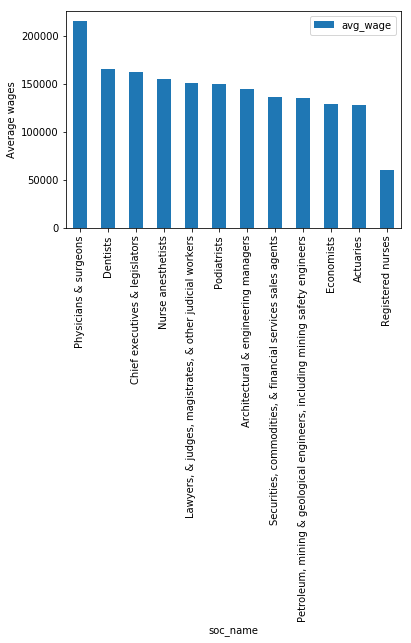

In [4]:
highest = wages[(wages["avg_wage"]>128000) | (wages["soc_name"] == "Registered nurses")]
highest.plot.bar(x = "soc_name", y = "avg_wage")
plt.ylabel('Average wages')

Next I'm showing the average income at the bottom of the U.S. economy compared to the average wage of Registered Nurses. From this I am gathering that nurses earn roughly six times as much as the lowest earning professions which roughly make around 12,000. 

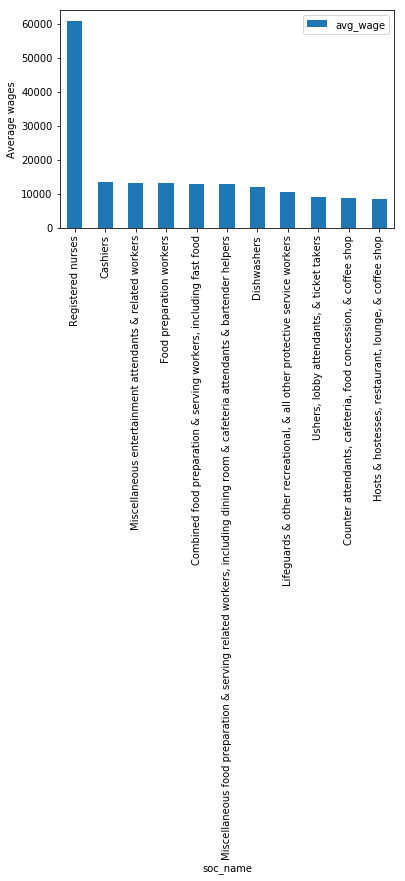

In [5]:
lowest = wages[(wages["avg_wage"]<14000) | (wages["soc_name"] == "Registered nurses")]
lowest.plot.bar(x = "soc_name", y = "avg_wage")
plt.ylabel('Average wages')

Next I'm going to filter all the wages by thier social ID number so that I can isolate all the healthcare professions. Then I will graph this distribution of wages.

In [6]:
wages['Healthcare'] = wages.soc.apply(lambda x:x[:3]) 

In [7]:
wages = wages[wages["Healthcare"] == '291']

Here I have filtered all the data to only include professions that are in the medical field. From this bar graph I can see that Registered nurses are eighth from the bottom. I also notice two interesting gaps from this data visualization. There appears to be a large jump in income between Optometrists and the next three highest earners: podiatrists, nurse anesthetists, and dentists. Then again, there is a large gap between dentists and the highest medical earners, physicians and surgeons. Out of these 21 medical professions, only 5 appear to earn over 100,000 and then only physicians and surgeons make over 200,000. 

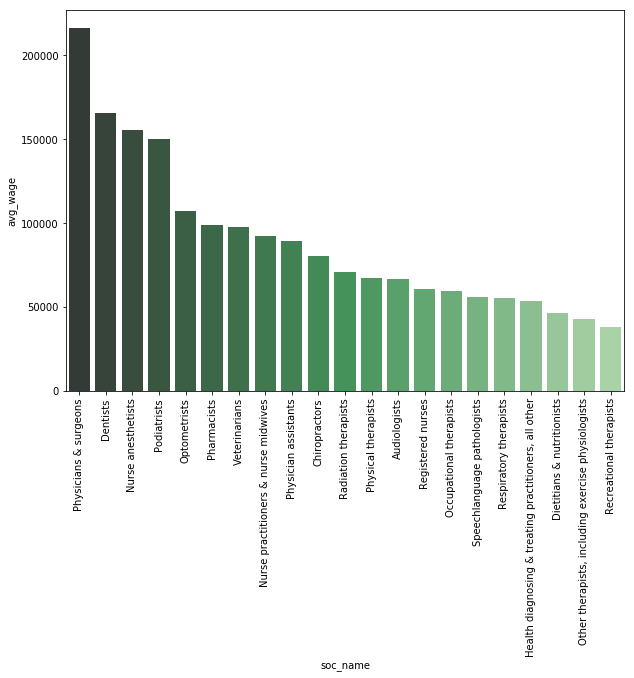

In [8]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
sns.barplot(x = "soc_name", y = "avg_wage", palette="Greens_d", data=wages)

Next, I'm wanting to separately visualize the average incomes of the highest, middle, and lowest earners in the medical profession. 

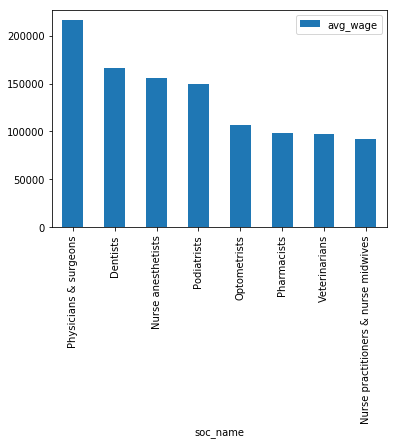

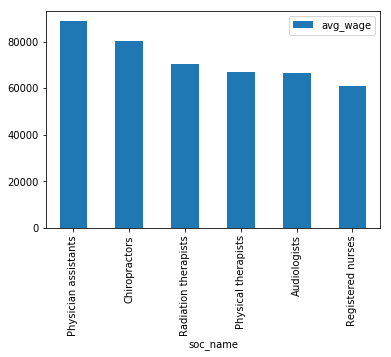

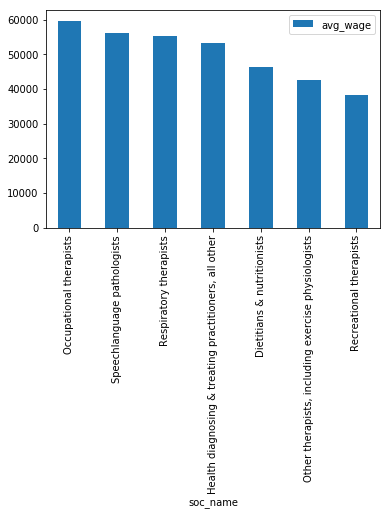

In [9]:
wages_highest = wages[wages["avg_wage"] > 90000]
wages_middle = wages[(wages["avg_wage"] < 90000) & (wages["avg_wage"] > 60000)]
wages_lowest = wages[wages["avg_wage"] < 60000]

wages_highest.plot.bar(x = "soc_name", y = "avg_wage")
wages_middle.plot.bar(x = "soc_name", y = "avg_wage")
wages_lowest.plot.bar(x = "soc_name", y = "avg_wage")


### #2 How does the income vary for Registered Nurses? How does this distribution compare to other medical professions? How did this income change between 2014 and 2015?

This first bar graph is rather simple, but shows the variation of incomes within the nursing profession. It is easy to see from this graph that the majority of nurses earn between 10K-50K dollars. It is also interesting to note the spike of nurses who earn over 200,000. I would say that this is a signal that my data set is limited because the nurse who earn more that 200K are all clumped together rather than allowing me to parse out their differences.

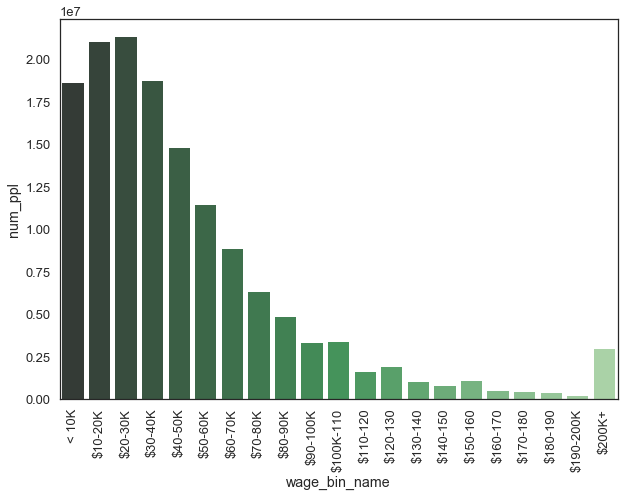

In [13]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
sns.barplot(x = "wage_bin_name", y = "num_ppl", palette="Greens_d", data=nurse_wages)

Again, I am filtering my population wage distributions by their social ID, to limit my dataset to only the healthcare profession. 

In [14]:
population_wages['Healthcare'] = population_wages.soc.apply(lambda x:x[:3])
population_wages = population_wages[population_wages["Healthcare"] == '291']

In [15]:
nurses_doctors = population_wages[(population_wages["soc"] == '291141') | (population_wages["soc"] == '291060')]

This next graph attempts to compare the range of incomes between nurses and doctors. But as you can see, the conclusions that I can draw are limited. The vast majority of physician and surgeon wages are lumped into the greater than 200K category. This means that my ability to parse out the variations for doctor incomes is significantly restricted. 

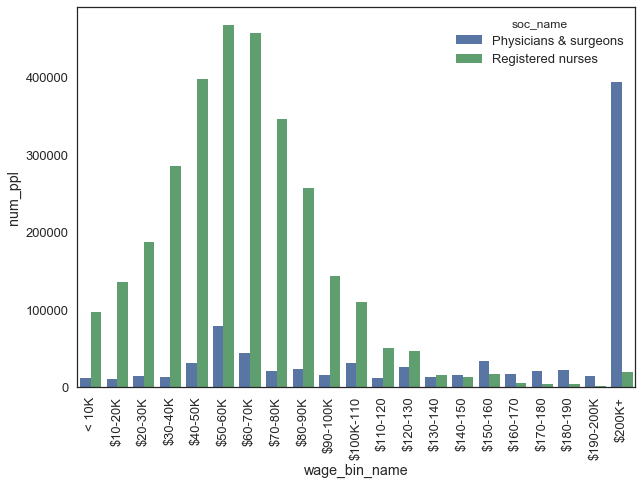

In [16]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
sns.barplot(x="wage_bin_name", y="num_ppl", hue="soc_name", data=nurses_doctors)

In [17]:
nurses_NurseAnesthetists = population_wages[(population_wages["soc"] == '291141') | (population_wages["soc"] == '291151')]

Now, I am comparing the wage distribution of nurses and nurse anesthetists. What I gather from this bar graph is that the sheer number of nurse anesthetists is much lower than the national number of registered nurses. I can also see that the starting wages of nurse anesthetist appears to begin towards the high end of registered nurse distributions. 

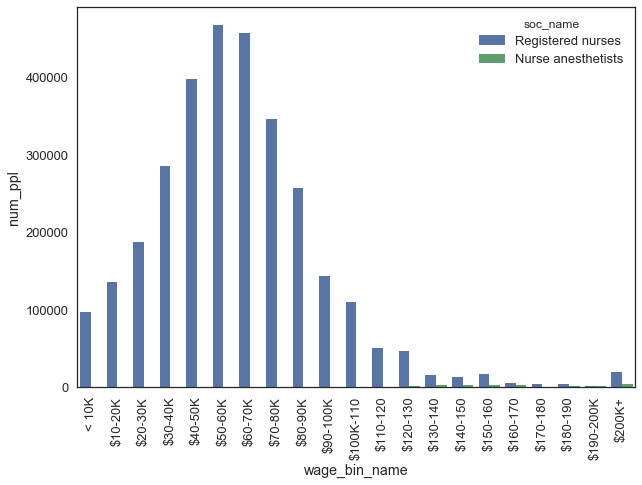

In [18]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
sns.barplot(x="wage_bin_name", y="num_ppl", hue="soc_name", data=nurses_NurseAnesthetists)

In [19]:
nurses_PractitionMidwife = population_wages[(population_wages["soc"] == '291141') | (population_wages["soc"] == '2911XX')]

Lastly, I'm showing the difference between registered nurses and both nurse practitioners and nurse midwives. Similar to the last bar graph, the quantity of registered nurses compared to both nurse practitioners and nurse midwives is drastically different. I do see more overlap for the range of incomes for these professions compared to my previous graphs. However, I believe that my dataset is limited by the fact that the nurse practitioners and nurse midwives are lumped into the same professional category. 

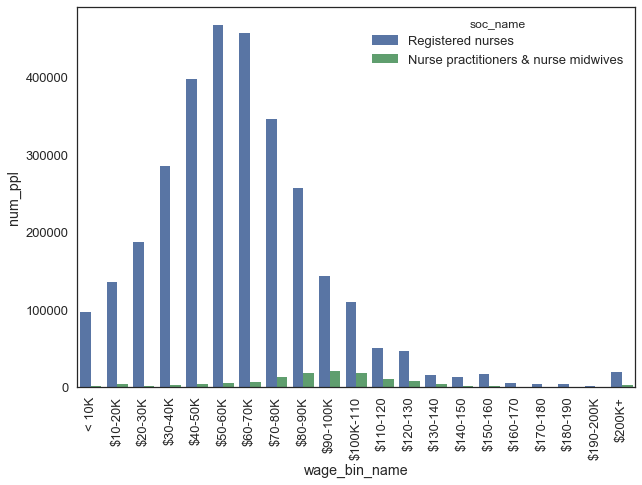

In [20]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
sns.barplot(x="wage_bin_name", y="num_ppl", hue="soc_name", data=nurses_PractitionMidwife)

In [21]:
nurse_wages = pd.read_csv('Nurses-Wages.csv')

This next bar graph shows the changes for registered nurse wage distributions between 2014 and 2015. While the shape of both distributions is roughly the same, I notice that almost all the categories greater that 20K shift upward in 2015. This informs me that possibly more nurses have entered the market, thereby increasing the number of nurses in that income bracket. However, a portion of nurses have might also have deliberately made a point to work more, which would also increase what income bracket they fall into. 

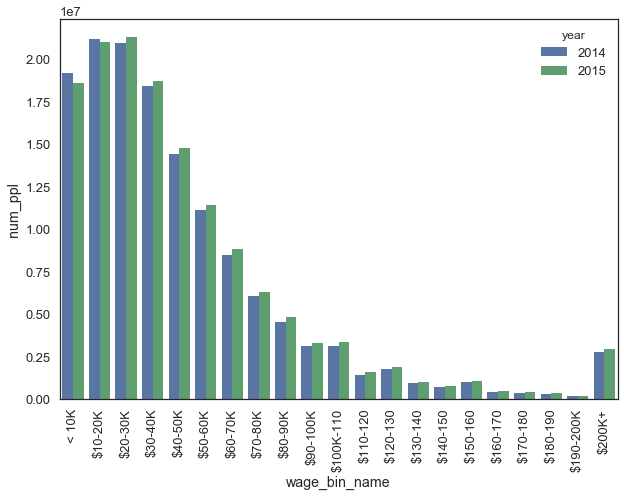

In [22]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
sns.barplot(x="wage_bin_name", y="num_ppl", hue="year", data=nurse_wages)

### #3 How does the number of registered nurses vary by industry? Does the industry difference affect the income level? 

For this last part, I'm going to focus solely on the variation with in the nursing profession

In [102]:
common = industry[industry["num_ppl"] > 100000]

My first figure in this section shows the healthcare industries that employ over 100,000 nurses. As you can see, hospitals far out number the other industries and appear to employ over three times as many nurses as the next four highest industries. 

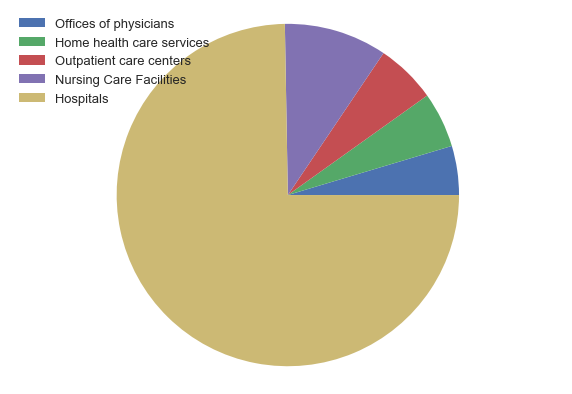

In [63]:
plt.figure(figsize=(10, 7))
plt.pie(common.num_ppl)
plt.axis('equal')
plt.legend(common.naics_name)

Next, I take the same data as above and put it in a bar graph to try and get a better idea of the variations in quantities between these most common industries. As we can see, hospitals employ around 2 million nurses where as the closest rival only has around 250,000. 

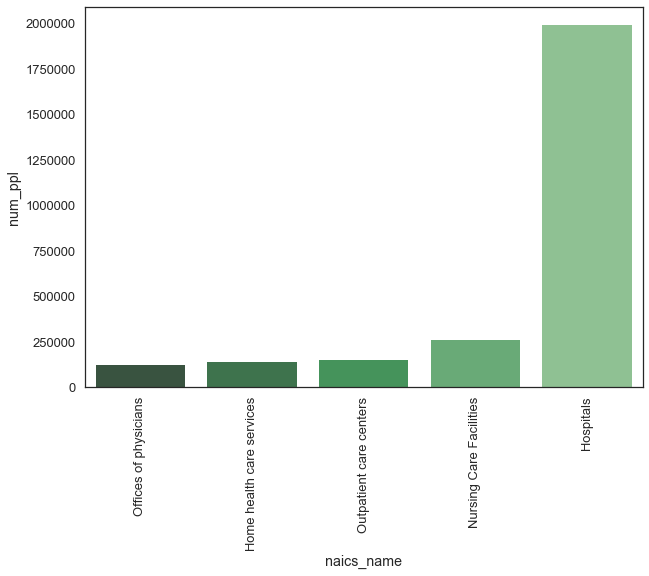

In [70]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
sns.barplot(x = "naics_name", y = "num_ppl", palette="Greens_d", data=common)

How about all the separate other medical industries that also employ nurses. Do their numbers compete with the large percentage of nurses that work at hospitals?  

In [128]:
total = []
total = common
other = industry.num_ppl[:50].sum()
total.loc[56] = other
total.loc[56, 'naics_name'] = 'Other'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In this next section, I add up all the separate industries that also employ nurses and put them into an 'Other' category. As compared to the pie graph above, there are a significant number of nurses who work in various other industries but overall hospitals still employ half of all nurses in the job market.

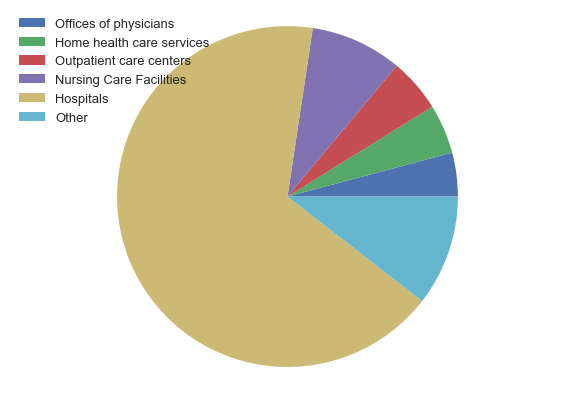

In [125]:
plt.figure(figsize=(10, 7))
plt.pie(total.num_ppl)
plt.axis('equal')
plt.legend(total.naics_name)

Again, I took the data from above and put it in a bar graph to compare the number of nurses who work in "other" industries to the most common ones. The "other" industries do in totality employ more nurses that the nursing care facilities but are still dwarfed by the hospital field. 

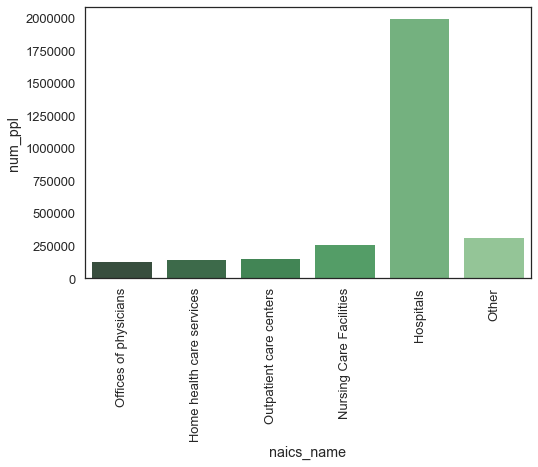

In [130]:
plt.figure(figsize=(8,5))
plt.xticks(rotation = 90)
sns.barplot(x = "naics_name", y = "num_ppl", palette="Greens_d", data=total)

In [5]:
highest = industry[industry["avg_wage"] > 85000]

Next, I isolated the professions where nurses earn an average of over 85,000. I put this data into a pie chart, but can I draw accurate conclusions about the actual number of nurses who work in these fields? No. A pie chart only shows me the separation of nurses by category in this sample, it is not able to tell me the total number of nurses in each of these industries. I also notice and interesting error in my data set. The "Management of companies & enterprises" is listed twice in the data set which alters the layout of the graph and my data. 

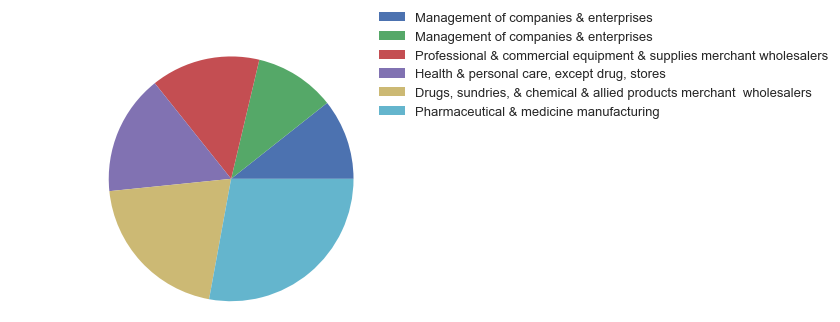

In [65]:
plt.figure(figsize=(8, 5))

pie = plt.pie(highest.num_ppl)
plt.axis('equal')
plt.legend(highest.naics_name, bbox_to_anchor=(0.75,1), loc="upper left", bbox_transform=plt.gcf().transFigure)

To get a more accurate visualization of the number of nurses in each of these fields, I put the same data as above into a bar graph. The sheer number of nurses who earn the most in these industries is minuscule compared to the previous graphs. As we can see, only around 1400 nurse work in the highest employer, pharmaceutical and medicine manufacturing. 

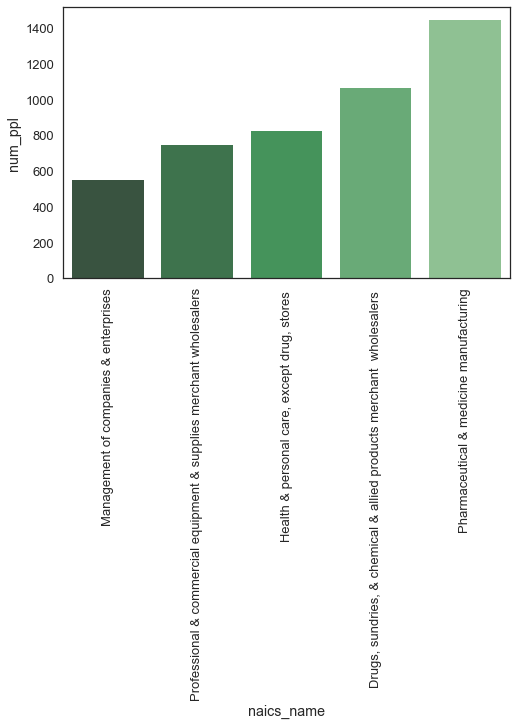

In [59]:
plt.figure(figsize=(8,5))
plt.xticks(rotation = 90)
sns.barplot(x = "naics_name", y = "num_ppl", palette="Greens_d", data=highest)

But lastly, I would like to see how these two categories: the most common employer and the highest earning industries, compare to each other on one graph. 

In [132]:
most = industry[(industry["avg_wage"] > 85000) | (industry["num_ppl"] > 100000)]

I start by showing how the industries where nurses earn the highest average incomes have negligibles numbers when compared to the most common industries. 

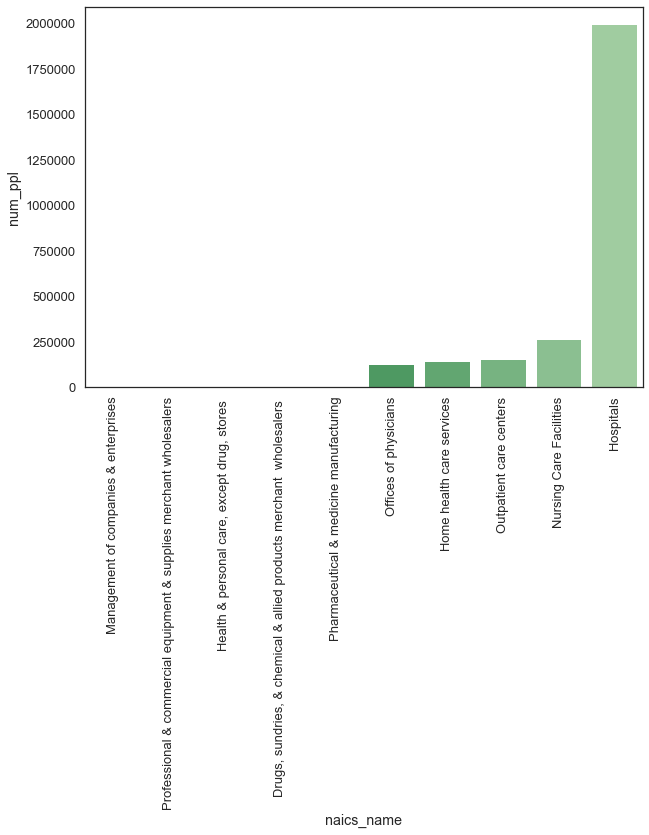

In [133]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
sns.barplot(x = "naics_name", y = "num_ppl", palette="Greens_d", data=most)

But when comparing the wages for the highest earning and the most common industries, we can see the significant difference in average incomes. The most common fields earn on average 20,000 less that the highest income industries. 

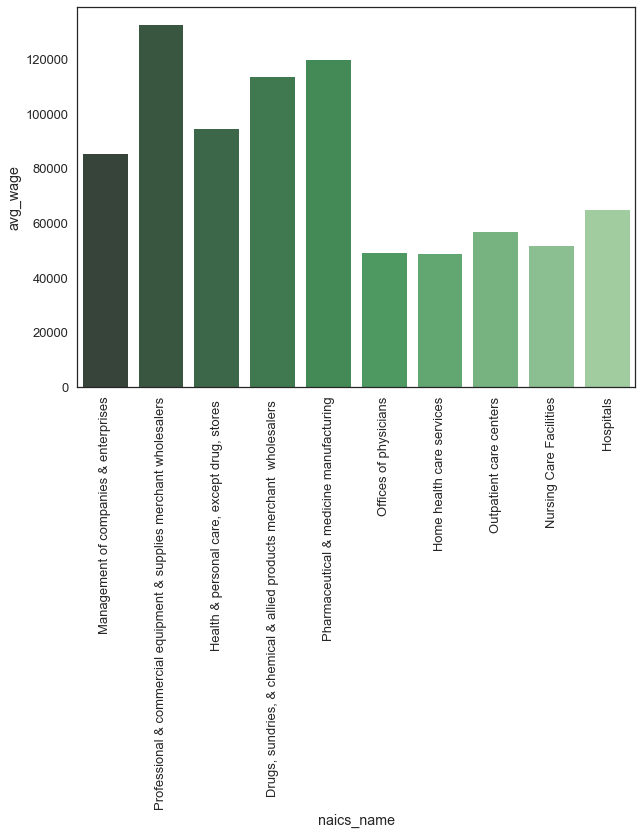

In [134]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
sns.barplot(x = "naics_name", y = "avg_wage", palette="Greens_d", data=most)

# Further Research

Some of the main limitations of my dataset is from the fact that I cannot compare the incomes of individual nurses. Many nurses might earn above the "average" income in the hospital industry but because of the sheer volume of nurses who work there, these numbers are lost by the calculated average. So a dataset that allows me to show a boxplot of these averages and ranges for the number of employed nurses and their incomes would be very helpful information. 

It would also be very insightful to see the changes for nursing income and work locations over time. My dataset is restricted to 2014 and 2015 which makes my timeline conclusions very limited. Has the total number of nurses in the U.S. grown or decreased in the last decade? Do nurses earn more, less, or the same compared to 10 years ago? Have any new industries that employ nurses appeared? 